In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gp
import geodatasets
import seaborn as sns


with open('data/filenames_camda2020.txt') as f:
    cities = [l.split('_')[3] for l in f.readlines()]

df = pd.read_csv('data/locations_meta.csv')

In [2]:
# dict {city_code : count}
count_d = dict((x,cities.count(x) / 2) for x in set(cities))
count_df = pd.DataFrame.from_dict(count_d, orient='index', columns=['count'])
#count_df['City_Code'] = count_df.index

In [3]:
df = df.set_index('City_Code')
# join with count dataframe
df = pd.concat([df, count_df], axis=1, join='inner')

# Bar Plot

In [4]:
# plt.barh(df['City'], df['count'], color='orange', height = 0.8)
# Remove x and y axis labels
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.grid(True)
sns.despine(left=True, bottom=True)

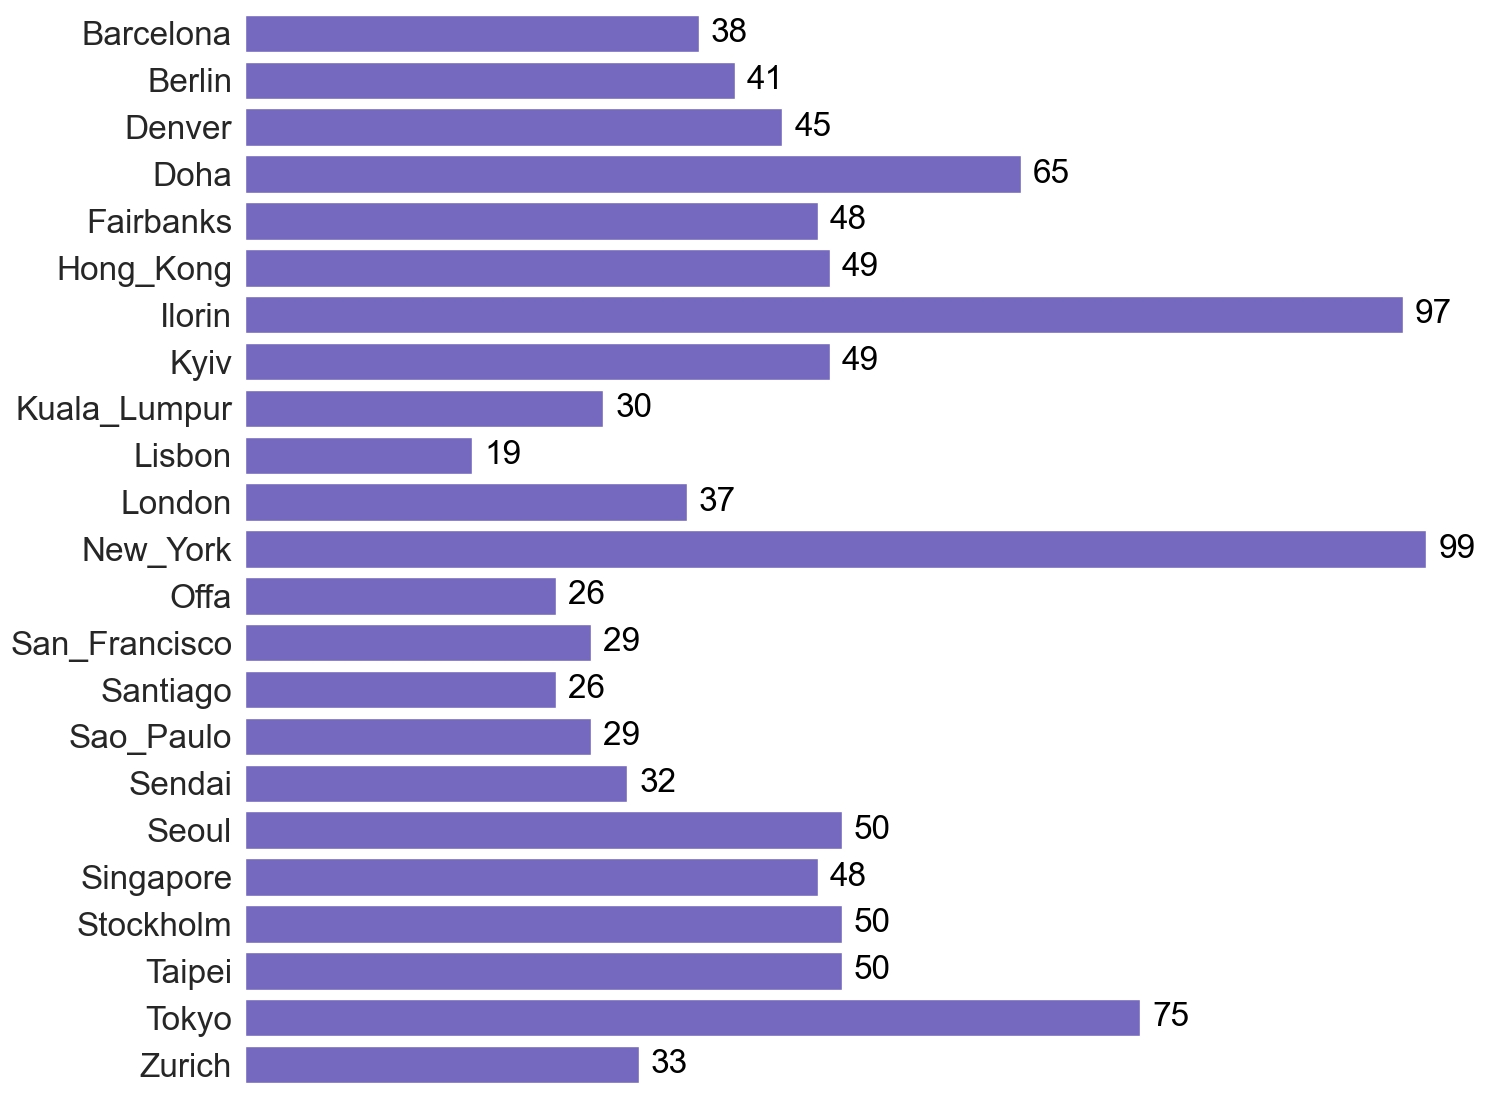

In [120]:
fig, ax1 = plt.subplots(figsize=(16, 14))

sns.set_theme(context  = {'font.size': 24,
                          'axes.labelsize': 'large',
                          'axes.titlesize': 'large'},
              style = {'figure.facecolor': 'white',
                       'axes.facecolor': 'white'},
            palette = sns.dark_palette("slateblue"))

sns.barplot(x = 'count', y = 'City', data = df,
            ax=ax1, color='slateblue')

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])

for index, value in enumerate(df['count']):
    ax1.text(value + 1 , index, f'{int(value)}', color='black', ha="left", va="center")

# Map

[geopandas guide](https://geopandas.org/en/v1.0.1/docs/user_guide/mapping.html)

In [8]:
#geodatasets.data.naturalearth.land

(-160.0, 150.0, -50.0, 85.0)

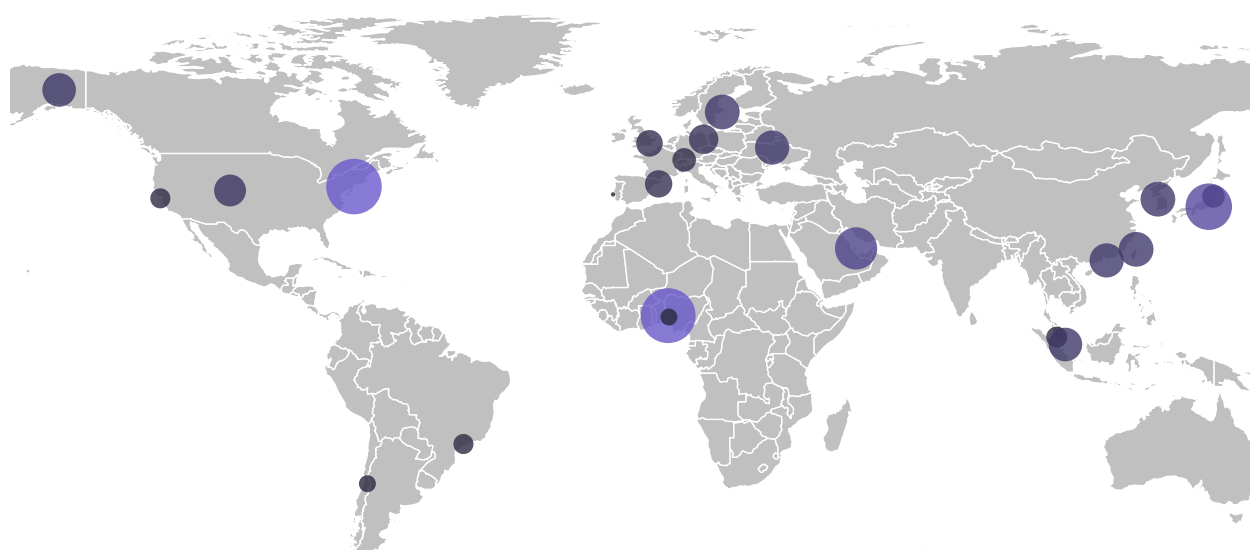

In [113]:
fig2, ax2 = plt.subplots(figsize=(16, 12))

worldmap = gp.read_file('data/ne_50m_admin_0_countries.zip')
worldmap.plot(color='silver', ax=ax2, edgecolor='white')

scatter = sns.scatterplot(data=df, x='City_Longitude', y='City_Latitude',
                          size='count', sizes=(10, 1600), edgecolor='none',
                          hue='count', alpha=0.8, legend=False, ax=ax2,
                          palette = sns.dark_palette('slateblue', as_cmap=True))

# Remove axis labels, ticks, and frame
#ax2.set_xlabel('')
#ax2.set_ylabel('')
#ax2.set_xticks([])
#ax2.set_yticks([])
ax2.set_xlim(-160, 150)
ax2.set_ylim(-50, 85)

# Remove axes and gridlines
ax2.axis('off')
#ax2.grid(False)